In [1]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq
from scipy.stats import f_oneway,tukey_hsd,ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams['savefig.dpi'] = 300

In [2]:
# parameters
y_axis_label = "Functional Score"
group_mean_label = "Mean Functional Score"
color_dict = {'WT':"#1DA5E4",'Nonsense Mutation':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}

# swarmplot legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=20),
    Line2D([0], [0], color='#786bac', lw=4, label='WT K3L', linestyle='--'),
    Line2D([0], [0], color='black', lw=4, label=group_mean_label, linestyle='-'),
]


/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_52092/3671029226.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_fold_change'] = df1[['fold_change_1','fold_change_2','fold_change_3']].mean(axis=1)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_52092/3671029226.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tp0_read_mean'] = df1[['1','2','3']].mean(axis=1)


(0.4, 2.4)

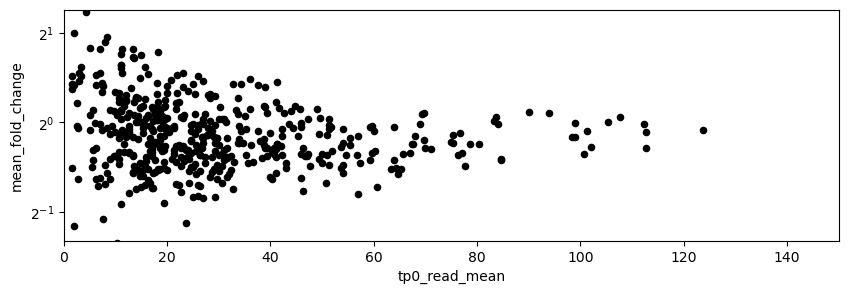

In [3]:
df = pd.read_csv('../data/221026_recheck-miseq-triplicates/barseq_counts.csv')

# normalize read count
sample_list = ['1','2','3','4','5','6']
for sample in sample_list:
    df[f'{sample}_norm'] = df[sample]/df[sample].sum()

# fold change
for t0,t1 in zip([1,2,3],[4,5,6]):
    df[f'fold_change_{t0}'] = df[f'{t1}_norm'] / df[f'{t0}_norm']
    
df['pkr'] = df['var'].str.split('_').str[0]
df['k3l'] = df['var'].str.split('_').str[1]

k3l_improved = ['C5G','K22E','H47R'] # Dever 1997
def k3l_type(x, k3l_stop = 88):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < k3l_stop:
        return "Nonsense Mutation"
    elif x[-2:] == 'WT':
        return "WT"
    elif x.split('-')[1] in k3l_improved:
        return "Known Improved Variant"
    else:
        return 'Missense Variant'
    
pkr_improved = ['E375V','I378T', 'R382I', 'I405M', 'S448G', 'M455V', 'A473T', 'E480D', 'D486V', 'T491S', 'S504L', 'E524V'] # Dever 2008
def pkr_type(x, pkr_stop = 550):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense Mutation"
    elif x[-2:] == 'WT':
        return "WT"
    elif x.split('-')[1] in pkr_improved:
        return "Known Improved Variant"
    else:
        return 'Missense Variant'

df['k3l_type'] = df['k3l'].apply(k3l_type)
df['pkr_type'] = df['pkr'].apply(pkr_type)

### select for only pairs to PKR-WT
df1 = df.query('pkr == "PKR-WT"')

df1['mean_fold_change'] = df1[['fold_change_1','fold_change_2','fold_change_3']].mean(axis=1)

df1['tp0_read_mean'] = df1[['1','2','3']].mean(axis=1)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,3)

ax = df1.plot.scatter(x='tp0_read_mean', y='mean_fold_change', color='black')
ax.set_xlim(0,150)
ax.set_yscale("log", base=2)
ax.set_ylim(bottom=.4, top=2.4)

In [4]:
df1.k3l_type.unique().tolist()

['WT', 'Missense Variant', 'Nonsense Mutation', 'Known Improved Variant']

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_52092/467874183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['k3_type_color'] = df1.k3l_type.map(color_dict)


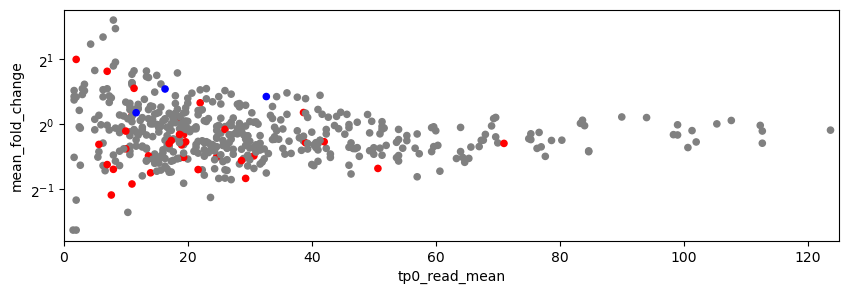

In [5]:
color_dict = {'WT':"green",'Nonsense Mutation':'red',"Known Improved Variant":"blue","Missense Variant":'gray'} # {'WT':"#1DA5E4",'STOP':'#F92321',"Resistant":"#242AD9","Variant":'gray'}
df1['k3_type_color'] = df1.k3l_type.map(color_dict)

ax = df1.plot.scatter(x='tp0_read_mean', y='mean_fold_change', c='k3_type_color')
ax.set_xlim(0,125)
ax.set_yscale("log", base=2)
#ax.set_ylim(bottom=0, top=10)

In [6]:
(df1.k3l.str[-1] == "*").sum()

35

In [7]:
df1.k3l.nunique()

497

(0.0, 150.0)

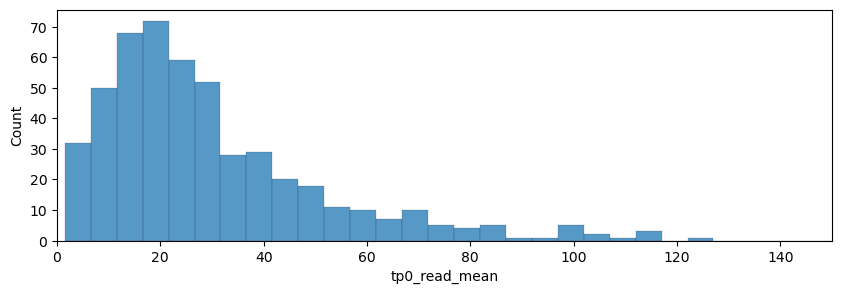

In [8]:
g=sns.histplot(data=df1, x='tp0_read_mean', bins=500)
g.set_xlim(0,150)

In [9]:
df1.k3l.nunique()

497

In [10]:
df1.query('tp0_read_mean > 17').k3l.nunique()

334

In [11]:
333/496

0.6713709677419355

In [12]:
# take only measures with >10 reads at TP-0
read_threshold = 18

df2 = df1.query('tp0_read_mean >= @read_threshold').melt(['k3l', 'k3l_type'], 'mean_fold_change')

# WT MEAN: 0.958688
df2.groupby('k3l_type')['value'].mean()

k3l_type
Known Improved Variant    1.345712
Missense Variant          0.899800
Nonsense Mutation         0.824706
WT                        0.958688
Name: value, dtype: float64

In [13]:
df2['Functional Score'] = np.log2(df2['value'])

In [14]:
df2

,k3l,k3l_type,variable,value,Functional Score
0,K3L-WT,WT,mean_fold_change,0.958688,-0.060867
1,K3L-N80I,Missense Variant,mean_fold_change,1.005721,0.008230
2,K3L-V59L,Missense Variant,mean_fold_change,0.781540,-0.355608
3,K3L-Y72C,Missense Variant,mean_fold_change,0.989684,-0.014960
4,K3L-T62S,Missense Variant,mean_fold_change,1.042987,0.060721
...,...,...,...,...,...
316,K3L-Y6C,Missense Variant,mean_fold_change,1.356753,0.440158
317,K3L-V65L,Missense Variant,mean_fold_change,0.947794,-0.077355
318,K3L-A25S,Missense Variant,mean_fold_change,1.128374,0.174246
319,K3L-L30V,Missense Variant,mean_fold_change,1.730163,0.790908


In [17]:
df2.sort_values('Functional Score', ascending=False).head(20)

,k3l,k3l_type,variable,value,Functional Score
319,K3L-L30V,Missense Variant,mean_fold_change,1.730163,0.790908
301,K3L-A41E,Missense Variant,mean_fold_change,1.463802,0.549720
220,K3L-E53K,Missense Variant,mean_fold_change,1.444683,0.530753
139,K3L-E37A,Missense Variant,mean_fold_change,1.433376,0.519417
102,K3L-M84V,Missense Variant,mean_fold_change,1.399059,0.484457
229,K3L-N10K,Missense Variant,mean_fold_change,1.395305,0.480581
233,K3L-I77M,Missense Variant,mean_fold_change,1.380438,0.465126
145,K3L-R50S,Missense Variant,mean_fold_change,1.363828,0.447661
316,K3L-Y6C,Missense Variant,mean_fold_change,1.356753,0.440158
151,K3L-H47R,Known Improved Variant,mean_fold_change,1.345712,0.428369


In [18]:
df2.query('k3l == "K3L-H47R"')

,k3l,k3l_type,variable,value,Functional Score
151,K3L-H47R,Known Improved Variant,mean_fold_change,1.345712,0.428369


In [20]:
df2[df2["Functional Score"] >= -0.060867].query('k3l_type != "WT"').shape

(104, 5)

In [12]:
df2[df2["Functional Score"] >= -0.060867].query('k3l_type == "Known Improved Variant"')

,k3l,k3l_type,variable,value,Functional Score
151,K3L-H47R,Known Improved Variant,mean_fold_change,1.345712,0.428369


In [25]:
104+216


320

In [24]:
df2[df2["Functional Score"] <= -0.060867]

,k3l,k3l_type,variable,value,Functional Score
0,K3L-WT,WT,mean_fold_change,0.958688,-0.060867
2,K3L-V59L,Missense Variant,mean_fold_change,0.781540,-0.355608
5,K3L-M84I,Missense Variant,mean_fold_change,0.829569,-0.269565
6,K3L-T73R,Missense Variant,mean_fold_change,0.940904,-0.087880
7,K3L-G60R,Missense Variant,mean_fold_change,0.818529,-0.288895
...,...,...,...,...,...
308,K3L-A25T,Missense Variant,mean_fold_change,0.957826,-0.062165
311,K3L-Y51H,Missense Variant,mean_fold_change,0.840158,-0.251267
312,K3L-M48T,Missense Variant,mean_fold_change,0.582536,-0.779581
315,K3L-R69*,Nonsense Mutation,mean_fold_change,0.898622,-0.154213


In [55]:
# k3l wt line
np.log2(df2.query('k3l_type == "WT"')['value'])

0   -0.060867
Name: value, dtype: float64

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84864/1007173916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Functional Score'] = np.log2(data['value'])


Mean functional score: -0.18188605709146444
Standard deviation: 0.30196306894381747


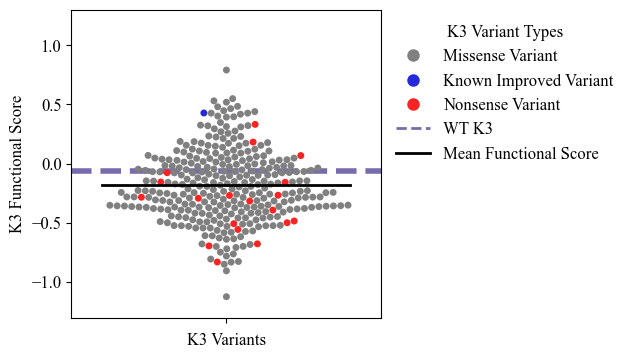

In [34]:
# main plot
output_file = '../img/k3l-data/k3l_variants-swarm_fs'

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

#sns.set_context("talk")

data = df2.query('k3l_type != "WT"')
data['Functional Score'] = np.log2(data['value'])

# swarmplot
color_dict = {'WT':"#1DA5E4",'Nonsense Mutation':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}


# plot parameters
fig_size=(4,4)
x=None
y='Functional Score'
color=None
hue='k3l_type'
palette=color_dict

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = fig_size

g = sns.swarmplot(
    x=x,
    y=y, 
    hue=hue, 
    data=data,
    palette = palette,
    #order=['Resistant','STOP','Variant'],
    #hue_order=['Resistant','STOP','Variant']
)

g.axhline(-0.060867, color='#786bac', linestyle='--', linewidth=4)
g.set_ylim(bottom=-1.3, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    #x="pkr_regions",
    y=y,
    data=data.query('k3l_type != "Nonsense Mutation"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    #order=['Region 1','Region 2','Region 3', 'Region 4'],
    ax=g
)

#g.get_xaxis().set_visible(False)
#g.get_yaxis().set_visible(False)

y_axis_label = "K3 Functional Score"
g.set_ylabel(y_axis_label)
g.set_xlabel('K3 Variants')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT K3', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),
]
g.legend(title='K3 Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')

fig = g.get_figure()
for extension in ['.svg']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)
    
print('Mean functional score:', data.query('k3l_type != "Nonsense Mutation"')['Functional Score'].mean())
print('Standard deviation:', data.query('k3l_type != "Nonsense Mutation"')['Functional Score'].std())

In [35]:
# make df3 for K3L

# remove WT and add 
df3 = df2.query('k3l_type != "WT"')
df3['k3l_site'] = df3.k3l.str.split('-').str[1].str[1:-1].astype(int)

# aa groups
aa_list = ['H','K','R','D','E','C','M','N','Q','S','T','A','I','L','V','F','W','Y','G','P','*']
aa_pos = ['H','K','R']
aa_neg = ['D','E']
aa_neutral = ['C','M','N','Q','S','T']
aa_nonpolar = ['A','I','L','V']
aa_aromatic = ['F','W','Y']
aa_unique = ['G','P']
aa_stop = ['*']
full_list = [aa_pos,aa_neg,aa_neutral,aa_nonpolar,aa_aromatic,aa_unique,aa_stop]

aa_categories = ['Positive Charge','Negative Charge','Polar-Neutral','Non-Polar','Aromatic','Unique','Stop']
aa_map = {aa:cat for temp_list,cat in zip(full_list,aa_categories) for aa in temp_list }

aa_categories_full = ['Positive Charge (HKR)','Negative Charge (DE)','Polar-Neutral (CMNQST)','Non-Polar (AILV)','Aromatic (FWY)','Unique (GP)','Stop']
full_cat_map = {aa_cat:full_cat for aa_cat,full_cat in zip(aa_categories,aa_categories_full)}

df3['aa_same_type'] = df3['k3l'].str.split('-').str[1].str[0].map(aa_map) == df3['k3l'].str.split('-').str[1].str[-1].map(aa_map)
df3['aa_wt'] = df3['k3l'].str.split('-').str[1].str[0].map(aa_map)
df3['aa_nonsynonymous'] = df3['k3l'].str.split('-').str[1].str[-1].map(aa_map)
df3['aa_wt_full'] = df3['aa_wt'].map(full_cat_map)
df3['aa_nonsynonymous_full'] = df3['aa_nonsynonymous'].map(full_cat_map)
df3['WT AA'] = df3['k3l'].str.split('-').str[1].str[0] # by AA residue, no groups
df3['Nonsynonymous AA'] = df3['k3l'].str.split('-').str[1].str[-1] # by AA residue, no groups
df3['aa_full_change'] = df3['aa_wt'] + " to " + df3['aa_nonsynonymous']

# contacts
k3l_pdb = [22,23,24,25,27,36,37,38,39,41,44,45,46,47,48,49,50,53,69,70,71,75,76,77,78]
k3l_af2 = [23,24,25,27,37,38,39,41,44,45,46,47,48,49,50,51,69,70,71,74,76,77,78,83]
k3l_both = set(k3l_pdb).union(set(k3l_af2)) 

def check_contact(col_value, contact_list=k3l_pdb, contact_string='Contact'):
    if col_value in contact_list:
        return contact_string
    else:
        return "No Contact"

df3['k3l_pdb'] = df3['k3l_site'].apply(lambda x: check_contact(x,contact_list=k3l_pdb, contact_string='PKR Contact'))
df3['k3l_af2'] = df3['k3l_site'].apply(lambda x: check_contact(x,contact_list=k3l_af2, contact_string='PKR Contact'))
df3['k3l_both'] = df3['k3l_site'].apply(lambda x: check_contact(x,contact_list=k3l_both, contact_string='PKR Contact'))

# eif2a-like mutation
eif2a_aln = "MPGLSCRFYQHKFPEVEDVVMVNVRSIAEMGAYVSLLEYNNIEGMILLSELSR--RRIRSINKLIRIGRNECVVVIRVDKEKGYIDLSKRRVSPEEAIKCEDKFTKSKTVYSILRHVAEV" # muscle alignment results
k3l_aln = "-----MLAFCYSLPNAGDVIKGRVYE-KDYALYIYLFDYPHFEAILAESVKMHMDRYVEYRDKL--VGKTVKVKVIRVDYTKGYIDVNYKRMCRHQ------------------------"
aln_score = "        : :.:*:. **:  .* .  : . *: *::* ::*.::  *   .  * :   :**  :*..  * *****  *****:. .*:.  :                        "
aln_zip = zip(list(eif2a_aln),list(k3l_aln),list(aln_score))
c = 1
k3l_n = []
for i,n in enumerate(aln_zip):
    if n[1] != "-":
        k3l_n.append(c)
        c = c + 1
    else:
        k3l_n.append('')
aln_zip = zip(list(eif2a_aln),list(k3l_aln),list(aln_score),k3l_n)

eif2a_like_map = {}
for n in aln_zip:
    if n[0] != "-"  and n[1] != "-":
        variant = n[1] + str(n[3]) + n[0]
        eif2a_like_map[variant] = 'eIF2α-like Variant'
df3['eif2a_like'] = df3['k3l'].str.split('-').str[1].map(eif2a_like_map)
df3['eif2a_like'].replace(np.nan, "Alternative Variant", inplace=True)

# similarity to eif2a
eif2a_n_map = {}
for n in zip(list(eif2a_aln),list(k3l_aln),list(aln_score),k3l_n):
    if n[3] != '':
        eif2a_n_map[n[3]] = n[0]
eif2a_n_map

# strongly or weakly similar
strongly_similar = ['STA','NEQK','NHQK','NDEQ','QHRK','MILV','MILF','HY','FYW']
weakly_similar = ['CSA','ATV','SAG','STNK','STPA','SGND','SNDEQK','NDEQHK','NEQHRK','FVLIM','HFY']

site = 4
variant = 'H'

def similarity(site, variant):
    #print('Site:', site, 'eIF2a res:', eif2a_n_map[site], 'Variant:', variant)
    if eif2a_n_map[site] == variant:
        return 'Same'
    for group in strongly_similar:
        if eif2a_n_map[site] in group and variant in group:
            return f'Strongly Similar'
    for group in weakly_similar:
        if eif2a_n_map[site] in group and variant in group:
            return f'Weakly Similar'
    return 'Not Similar'

df3['eif2a_similarity'] = df3.apply(lambda x: similarity(x['k3l_site'], x['Nonsynonymous AA']), axis=1)

# similarity score for k3l wt and variant
def var_similarity_score(site, variant):
    #print('Site:', site, 'eIF2a res:', eif2a_n_map[site], 'Variant:', variant)
    if eif2a_n_map[site] == variant:
        return 3
    for group in strongly_similar:
        if eif2a_n_map[site] in group and variant in group:
            return 2
    for group in weakly_similar:
        if eif2a_n_map[site] in group and variant in group:
            return 1
    return 0
        
def wt_similarity_score(site, wt):
    #print('Site:', site, 'eIF2a res:', eif2a_n_map[site], 'Variant:', variant)
    if eif2a_n_map[site] == wt:
        return 3
    for group in strongly_similar:
        if eif2a_n_map[site] in group and wt in group:
            return 2
    for group in weakly_similar:
        if eif2a_n_map[site] in group and wt in group:
            return 1
    return 0

df3['score_var'] = df3.apply(lambda x: var_similarity_score(x['k3l_site'], x['Nonsynonymous AA']), axis=1)
df3['score_wt'] = df3.apply(lambda x: wt_similarity_score(x['k3l_site'], x['WT AA']), axis=1)
df3['score'] = df3.score_var - df3.score_wt

df3.head()

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84864/2655712549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['k3l_site'] = df3.k3l.str.split('-').str[1].str[1:-1].astype(int)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84864/2655712549.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['aa_same_type'] = df3['k3l'].str.split('-').str[1].str[0].map(aa_map) == df3['k3l'].str.split('-').str[1].str[-1].map(aa_map)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipyker

,k3l,k3l_type,variable,value,k3l_site,aa_same_type,aa_wt,aa_nonsynonymous,aa_wt_full,aa_nonsynonymous_full,...,Nonsynonymous AA,aa_full_change,k3l_pdb,k3l_af2,k3l_both,eif2a_like,eif2a_similarity,score_var,score_wt,score
1,K3L-N80I,Missense Variant,mean_fold_change,1.005721,80,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),Non-Polar (AILV),...,I,Polar-Neutral to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant,Not Similar,0,1,-1
2,K3L-V59L,Missense Variant,mean_fold_change,0.781540,59,True,Non-Polar,Non-Polar,Non-Polar (AILV),Non-Polar (AILV),...,L,Non-Polar to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant,Strongly Similar,2,2,0
3,K3L-Y72C,Missense Variant,mean_fold_change,0.989684,72,False,Aromatic,Polar-Neutral,Aromatic (FWY),Polar-Neutral (CMNQST),...,C,Aromatic to Polar-Neutral,No Contact,No Contact,No Contact,Alternative Variant,Not Similar,0,0,0
4,K3L-T62S,Missense Variant,mean_fold_change,1.042987,62,True,Polar-Neutral,Polar-Neutral,Polar-Neutral (CMNQST),Polar-Neutral (CMNQST),...,S,Polar-Neutral to Polar-Neutral,No Contact,No Contact,No Contact,Alternative Variant,Weakly Similar,1,1,0
5,K3L-M84I,Missense Variant,mean_fold_change,0.829569,84,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),Non-Polar (AILV),...,I,Polar-Neutral to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant,Strongly Similar,2,2,0


In [58]:
data.k3l_type.unique()

array(['Missense Variant', 'Nonsense Mutation'], dtype=object)

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84864/814431509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Functional Score'] = np.log2(data['value'])


Group 1: -0.19114647896427678 0.2957764303844882
Group 2: -0.1855003967567853 0.3197654392022017

T statistic: -0.15389024399298978
p-value: 0.8777938907042175
Degrees of Freedom: 318

The difference in mean Functional Score between K3L variants that do not contact PKR (M=-0.19, SD=0.3) and sites that contact PKR (M=-0.19, SD=0.32 is not significant (Independent T-test, t(318)=-0.15, p=0.87779).


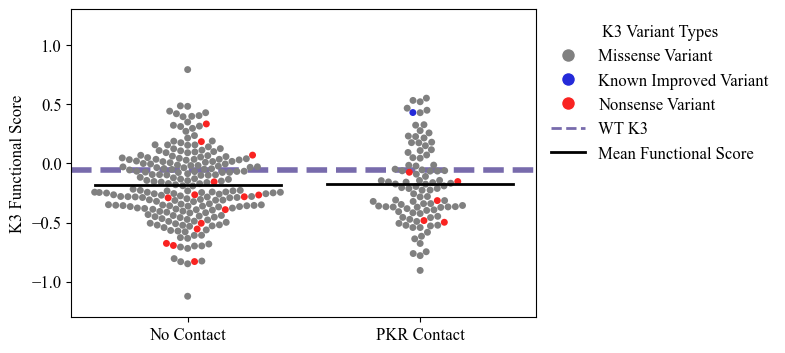

In [37]:
output_file = '../img/k3l-data/k3l_pkr-contact_fs'

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

data = df3
data['Functional Score'] = np.log2(data['value'])

# contact to PKR
x_axis = 'k3l_pdb'
y_axis = 'Functional Score'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='k3l_type',
    data=df3,
    order=['No Contact', 'PKR Contact'],
)

g.axhline(-0.060867, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_ylim(bottom=-1.3, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=data.query('k3l_type != "Nonsense Mutation"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', 'PKR Contact'],
    ax=g
)

y_axis_label = "K3 Functional Score"
g.set_ylabel(y_axis_label)
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT K3', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),
]
g.legend(title='K3 Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')

# save figure
fig = g.get_figure()
for extension in ['.svg']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)

# stats: independent t-test (aka two-sample t test)
group1 = data[data[x_axis] == "No Contact"].query('k3l_type != "Nonsynonymous Mutation"')['Functional Score']
group2 = data[data[x_axis] == "PKR Contact"].query('k3l_type != "Nonsynonymous Mutation"')['Functional Score']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between K3L variants that do not contact PKR (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact PKR (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is not significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

The difference in mean Functional Score between K3L variants that do not contact PKR (M=0.9, SD=0.18) and sites that contact PKR (M=0.91, SD=0.21 is not significant (Independent T-test, t(298)=-0.39, p=0.70008).

No significance for AF2 contacts or both combined

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84864/1359597673.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Functional Score'] = np.log2(data['value'])


Group 1: 0.8959070529367096 0.19333557441716967
Group 2: 0.9910610813415585 0.20233124327108615

T statistic: -1.966129506201536
p-value: 0.05020859285600478
Degrees of Freedom: 299

The difference in mean Functional Score between K3L variants that do not contact PKR (M=0.9, SD=0.19) and sites that contact PKR (M=0.99, SD=0.2 is not significant (Independent T-test, t(299)=-1.97, p=0.05021).


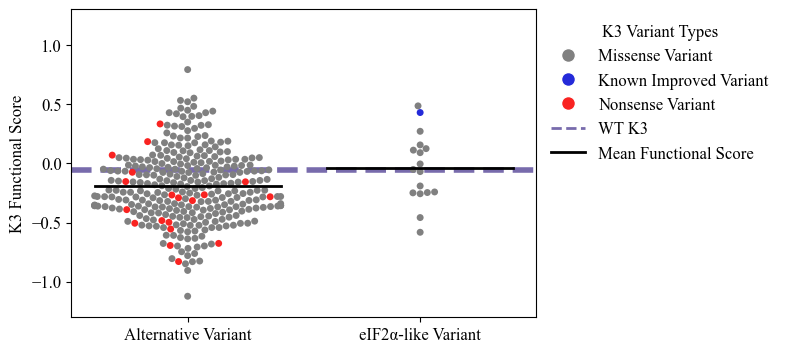

In [38]:
# eif2a-like
output_file = '../img/k3l-data/k3l_eif2a-like_fs'

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

data = df3
data['Functional Score'] = np.log2(data['value'])

# contact to PKR
x_axis = 'eif2a_like'
y_axis = 'Functional Score'
order_list = ['Alternative Variant', 'eIF2α-like Variant']

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='k3l_type',
    data=df3,
    order=order_list,
)

g.axhline(-0.060867, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_ylim(bottom=-1.3, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df3.query('k3l_type != "Nonsense Mutation"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=order_list,
    ax=g
)

y_axis_label = "K3 Functional Score"
g.set_ylabel(y_axis_label)
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT K3', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),
]
g.legend(title='K3 Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')

# save figure
fig = g.get_figure()
for extension in ['.svg']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = data[data[x_axis] == order_list[0]].query('k3l_type != "Nonsense Mutation"')['value']
group2 = data[data[x_axis] == order_list[1]].query('k3l_type != "Nonsense Mutation"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between K3L variants that do not contact PKR (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact PKR (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is not significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

The difference in mean Functional Score between K3L variants that are unlike eIF2a (M=0.89, SD=0.19) and variants that make K3L more eIF2a-like (M=0.99, SD=0.2 is hardly significant (Independent T-test, t(298)=-2.01, p=0.04496).  Stop variants are withdrawn from calculating group means and statistics.

1.7684522726844398
0.15308619953816296

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.021     0.907    -0.059     0.101
 (0 - 2)     -0.016     0.936    -0.086     0.054
 (0 - 3)     -0.100     0.178    -0.227     0.027
 (1 - 0)     -0.021     0.907    -0.101     0.059
 (1 - 2)     -0.037     0.735    -0.129     0.056
 (1 - 3)     -0.121     0.120    -0.261     0.020
 (2 - 0)      0.016     0.936    -0.054     0.086
 (2 - 1)      0.037     0.735    -0.056     0.129
 (2 - 3)     -0.084     0.379    -0.219     0.051
 (3 - 0)      0.100     0.178    -0.027     0.227
 (3 - 1)      0.121     0.120    -0.020     0.261
 (3 - 2)      0.084     0.379    -0.051     0.219



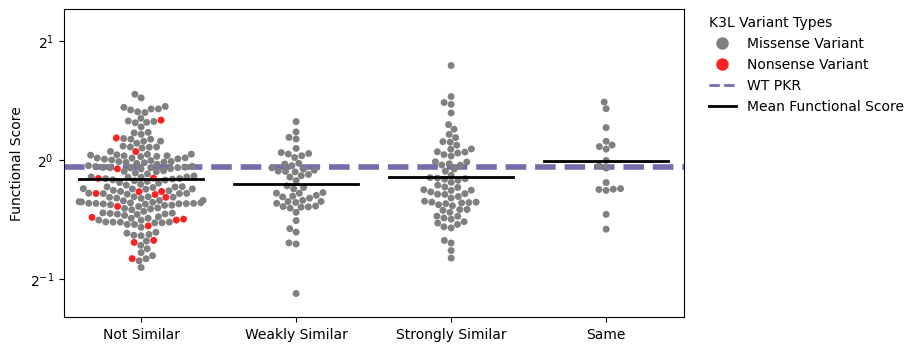

In [117]:
# eif2a similarity
output_file = '../img/k3l-data/k3l_eif2a-similarity_fs'

# contact to PKR
x_axis = 'eif2a_similarity'
y_axis = 'value'
order_list = ['Not Similar', 'Weakly Similar', 'Strongly Similar', 'Same']

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (8,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='k3l_type',
    data=df3,
    order=order_list,
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df3.query('aa_nonsynonymous != "Stop"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=order_list,
    ax=g
)

g.set_ylabel(y_axis_label)
g.set_xlabel('')
g.legend(title='K3L Variant Types', handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 

# save figure
fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats
# one-way anova to reject null (no difference between means)
not_similar = df3.query(f'{x_axis} == "Not Similar" and k3l_type != "Nonsense"')['value'].to_numpy()
weakly = df3.query(f'{x_axis} == "Weakly Similar" and k3l_type != "Nonsense"')['value'].to_numpy()
strongly = df3.query(f'{x_axis} == "Strongly Similar" and k3l_type != "Nonsense"')['value'].to_numpy()
same = df3.query(f'{x_axis} == "Same" and k3l_type != "Nonsense"')['value'].to_numpy()

F, p = f_oneway(not_similar,weakly,strongly,same)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(not_similar,weakly,strongly,same)
print(result)

In [118]:
# stats: independent t-test (aka two-sample t test)
group1 = df3[df3[x_axis] == order_list[0]].query('aa_nonsynonymous != "Stop"')['value']
group2 = df3[df3[x_axis] == order_list[3]].query('aa_nonsynonymous != "Stop"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

Group 1: 0.896160485936132 0.19092324397950802
Group 2: 0.9910610813415585 0.20233124327108615

T statistic: -1.9395593533590028
p-value: 0.05401403111613399
Degrees of Freedom: 178


1.348602628893567
0.23521480177624665

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.018     0.999    -0.136     0.101
 (0 - 2)     -0.064     0.614    -0.177     0.048
 (0 - 3)     -0.035     0.943    -0.135     0.065
 (0 - 4)     -0.090     0.387    -0.220     0.040
 (0 - 5)     -0.003     1.000    -0.183     0.178
 (0 - 6)     -0.221     0.695    -0.637     0.194
 (1 - 0)      0.018     0.999    -0.101     0.136
 (1 - 2)     -0.047     0.872    -0.158     0.064
 (1 - 3)     -0.018     0.998    -0.116     0.081
 (1 - 4)     -0.072     0.643    -0.201     0.057
 (1 - 5)      0.015     1.000    -0.165     0.195
 (1 - 6)     -0.204     0.771    -0.619     0.212
 (2 - 0)      0.064     0.614    -0.048     0.177
 (2 - 1)      0.047     0.872    -0.064     0.158
 (2 - 3)      0.029     0.963    -0.062     0.120
 (2 - 4)     -0.025     0.997    -0.148     0.098
 (2 - 5)      0.062     0.944    -0.114    

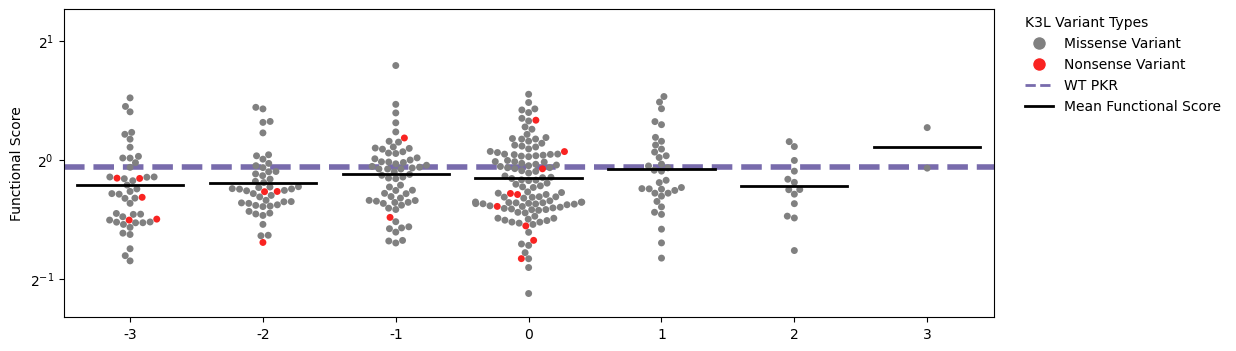

In [119]:
# eif2a similarity score
# -3 to 3, -3=wt same to not similar, 3=not similar to same
output_file = '../img/k3l-data/k3l_eif2a-similarity-score'

# contact to PKR
x_axis = 'score'
y_axis = 'value'
order_list = [-3,-2,-1,0,1,2,3]

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='k3l_type',
    data=df3,
    order=order_list,
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df3.query('aa_nonsynonymous != "Stop"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=order_list,
    ax=g
)

g.set_ylabel(y_axis_label)
g.set_xlabel('')
g.legend(title='K3L Variant Types', handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 

# save figure
fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats
# one-way anova to reject null (no difference between means)
score_n3 = df3.query(f'{x_axis} == {order_list[0]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_n2 = df3.query(f'{x_axis} == {order_list[1]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_n1 = df3.query(f'{x_axis} == {order_list[2]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_0 = df3.query(f'{x_axis} == {order_list[3]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_1 = df3.query(f'{x_axis} == {order_list[4]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_2 = df3.query(f'{x_axis} == {order_list[5]} and k3l_type != "Nonsense"')['value'].to_numpy()
score_3 = df3.query(f'{x_axis} == {order_list[6]} and k3l_type != "Nonsense"')['value'].to_numpy()

F, p = f_oneway(score_n3,score_n2,score_n1,score_0,score_1,score_2,score_3)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(score_n3,score_n2,score_n1,score_0,score_1,score_2,score_3)
print(result)

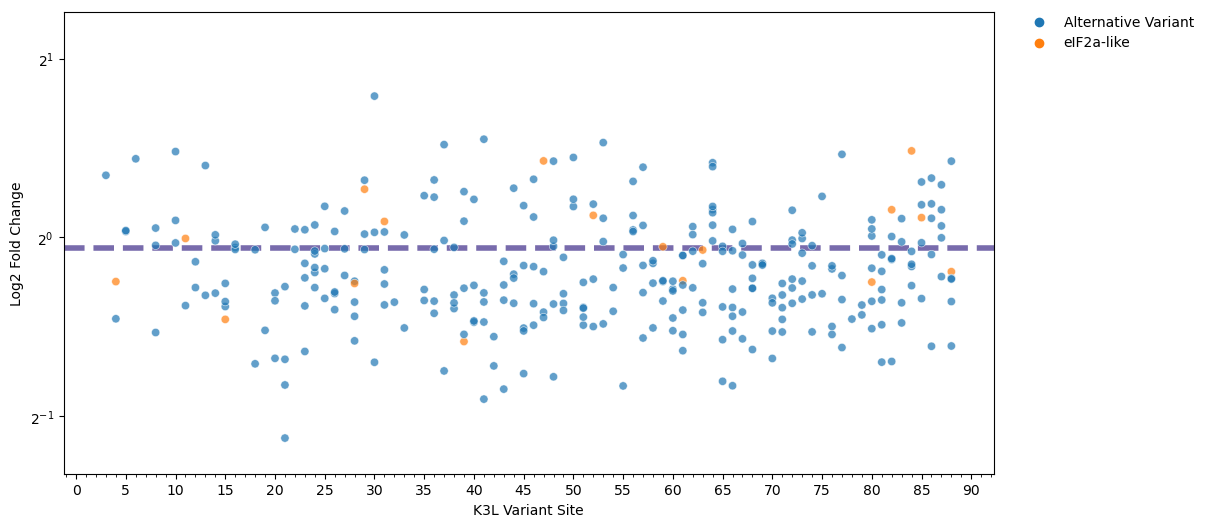

In [53]:
# variation across K3L
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,6)

g = sns.scatterplot(
    data=df3, 
    x='k3l_site',
    y='value',
    hue='eif2a_like',
    #hue_order=aa_categories,
    #color='black',
    #palette=color_dict,
    zorder=2,
    alpha=.7
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)

g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)
g.xaxis.set_minor_locator(MultipleLocator(1))
g.xaxis.set_major_locator(MultipleLocator(5))


g.set_ylabel('Log2 Fold Change')
g.set_xlabel('K3L Variant Site')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]
g.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 

In [55]:
df3.head()

,k3l,k3l_type,variable,value,k3l_site,aa_same_type,aa_wt,aa_nonsynonymous,aa_wt_full,aa_nonsynonymous_full,WT AA,Nonsynonymous AA,aa_full_change,k3l_pdb,k3l_af2,k3l_both,eif2a_like
1,K3L-N80I,Missense Variant,mean_fold_change,1.005721,80,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),Non-Polar (AILV),N,I,Polar-Neutral to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant
2,K3L-V59L,Missense Variant,mean_fold_change,0.781540,59,True,Non-Polar,Non-Polar,Non-Polar (AILV),Non-Polar (AILV),V,L,Non-Polar to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant
3,K3L-Y72C,Missense Variant,mean_fold_change,0.989684,72,False,Aromatic,Polar-Neutral,Aromatic (FWY),Polar-Neutral (CMNQST),Y,C,Aromatic to Polar-Neutral,No Contact,No Contact,No Contact,Alternative Variant
4,K3L-T62S,Missense Variant,mean_fold_change,1.042987,62,True,Polar-Neutral,Polar-Neutral,Polar-Neutral (CMNQST),Polar-Neutral (CMNQST),T,S,Polar-Neutral to Polar-Neutral,No Contact,No Contact,No Contact,Alternative Variant
5,K3L-M84I,Missense Variant,mean_fold_change,0.829569,84,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),Non-Polar (AILV),M,I,Polar-Neutral to Non-Polar,No Contact,No Contact,No Contact,Alternative Variant


In [54]:
df3.columns.tolist()

['k3l',
 'k3l_type',
 'variable',
 'value',
 'k3l_site',
 'aa_same_type',
 'aa_wt',
 'aa_nonsynonymous',
 'aa_wt_full',
 'aa_nonsynonymous_full',
 'WT AA',
 'Nonsynonymous AA',
 'aa_full_change',
 'k3l_pdb',
 'k3l_af2',
 'k3l_both',
 'eif2a_like']

In [ ]:
# possible to further parse eif2a-like variants of K3L?

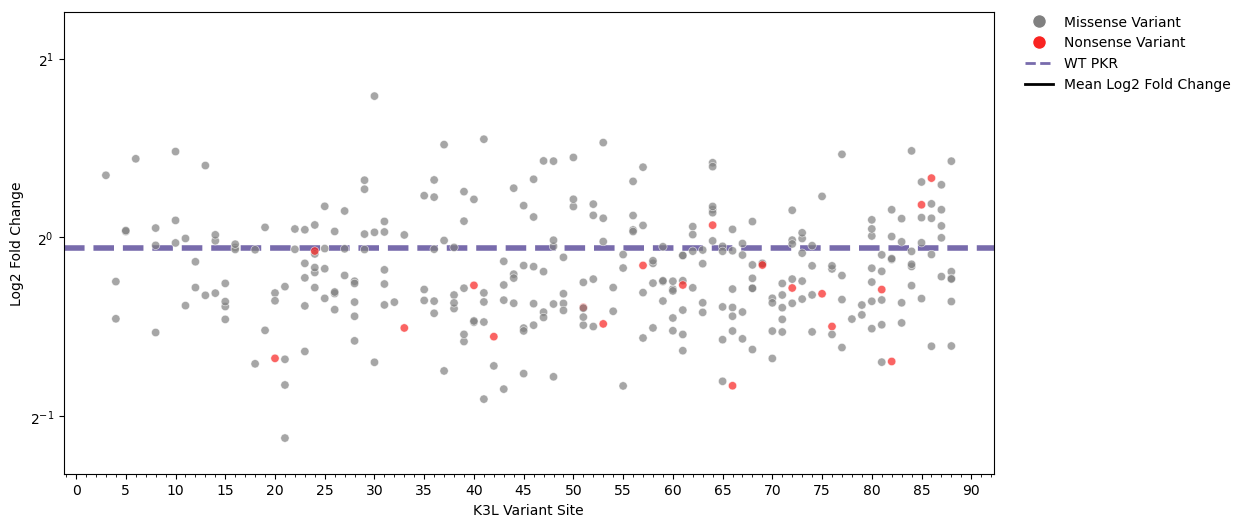

In [57]:
# variation across K3L
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,6)

g = sns.scatterplot(
    data=df3, 
    x='k3l_site',
    y='value',
    hue='k3l_type',
    #hue_order=aa_categories,
    #color='black',
    palette=color_dict,
    zorder=2,
    alpha=.7
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)

g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)
g.xaxis.set_minor_locator(MultipleLocator(1))
g.xaxis.set_major_locator(MultipleLocator(5))


g.set_ylabel('Log2 Fold Change')
g.set_xlabel('K3L Variant Site')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]
g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 

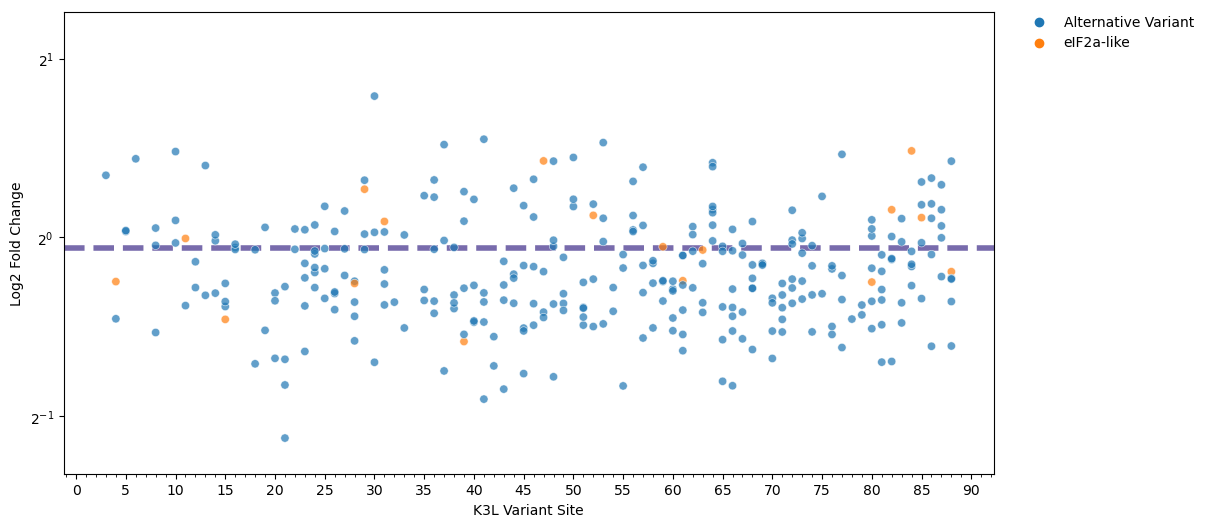

In [51]:
# variation across K3L
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,6)

g = sns.scatterplot(
    data=df3, 
    x='k3l_site',
    y='value',
    hue='eif2a_like',
    #hue_order=aa_categories,
    #color='black',
    #palette=color_dict,
    zorder=2,
    alpha=.7
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)

g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)
g.xaxis.set_minor_locator(MultipleLocator(1))
g.xaxis.set_major_locator(MultipleLocator(5))


g.set_ylabel('Log2 Fold Change')
g.set_xlabel('K3L Variant Site')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#786bac', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]
g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 

In [ ]:
# PKR contacts


Group 1: 0.8968921617115543 0.18422603585361544
Group 2: 0.9061862987794163 0.21297472261893932

T statistic: -0.3855792662837417
p-value: 0.7000833865889756
Degrees of Freedom: 298

The difference in mean Functional Score between PKR variants that do not contact K3L (M=0.9, SD=0.18) and sites that contact K3L (M=0.91, SD=0.21 is significant (Independent T-test, t(298)=-0.39, p=0.70008).


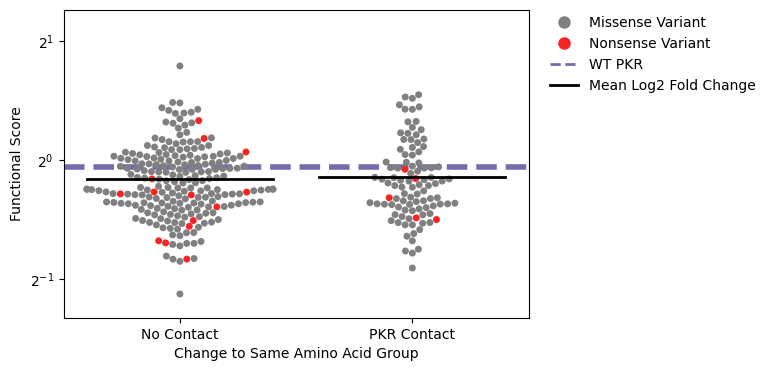

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/949115959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['aa_wt'] = df3['k3l'].str.split('-').str[1].str[0].map(aa_map)


Text(0.5, 14.722222222222216, 'Change from this AA group')

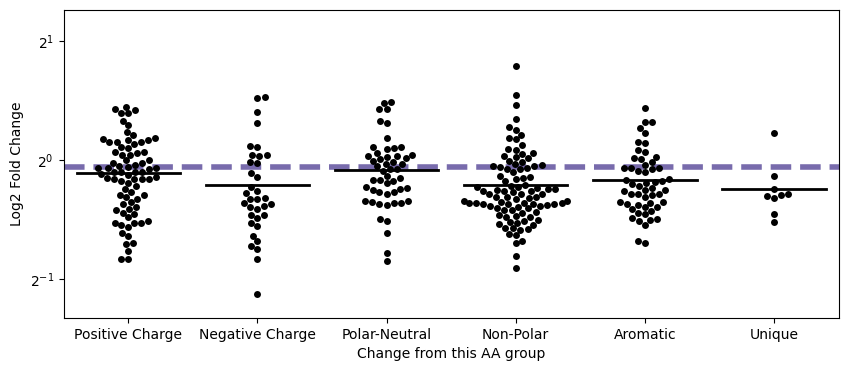

In [117]:
df3['aa_wt'] = df3['k3l'].str.split('-').str[1].str[0].map(aa_map)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='aa_wt',
    y='value', 
    color='black', 
    data=df3,
    #palette = color_dict,
    order=aa_categories[:-1],
    #hue_order=['Resistant','STOP','Variant'],
    #estimator='mean'
)


g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_wt",
    y="value",
    data=df3,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories[:-1],
    ax=g
)
g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change from this AA group')

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/595771428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['aa_nonsynonymous'] = df3['k3l'].str.split('-').str[1].str[-1].map(aa_map)


Text(0.5, 14.722222222222216, 'Change to this AA group')

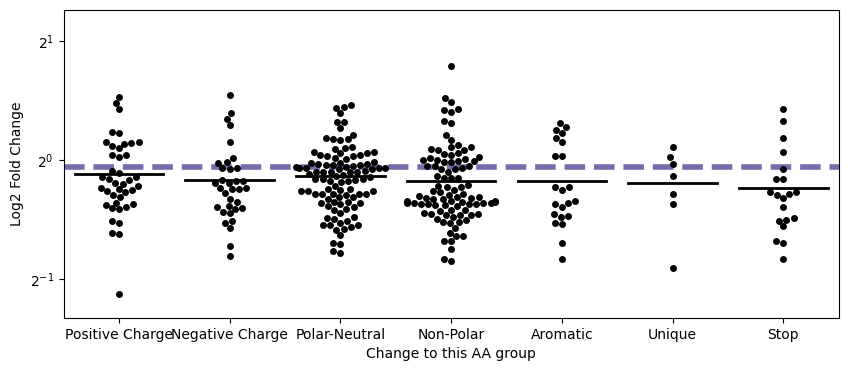

In [121]:
df3['aa_nonsynonymous'] = df3['k3l'].str.split('-').str[1].str[-1].map(aa_map)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='aa_nonsynonymous',
    y='value', 
    color='black',
    #hue='aa_same_category', 
    data=df3,
    #palette = color_dict,
    order=aa_categories,
    #hue_order=['Resistant','STOP','Variant']
)


g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)


# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_nonsynonymous",
    y="value",
    data=df3,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change to this AA group')

In [123]:
# go by individual residues
df3['WT AA'] = df3['k3l'].str.split('-').str[1].str[0]
df3['Nonsynonymous AA'] = df3['k3l'].str.split('-').str[1].str[-1]

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/1689524563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WT AA'] = df3['k3l'].str.split('-').str[1].str[0]
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/1689524563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Nonsynonymous AA'] = df3['k3l'].str.split('-').str[1].str[-1]


/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/2265428799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WT AA'] = df3['k3l'].str.split('-').str[1].str[0]
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_35342/2265428799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Nonsynonymous AA'] = df3['k3l'].str.split('-').str[1].str[-1]
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the

Text(0.5, 14.722222222222216, 'Change from this WT AA')

/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


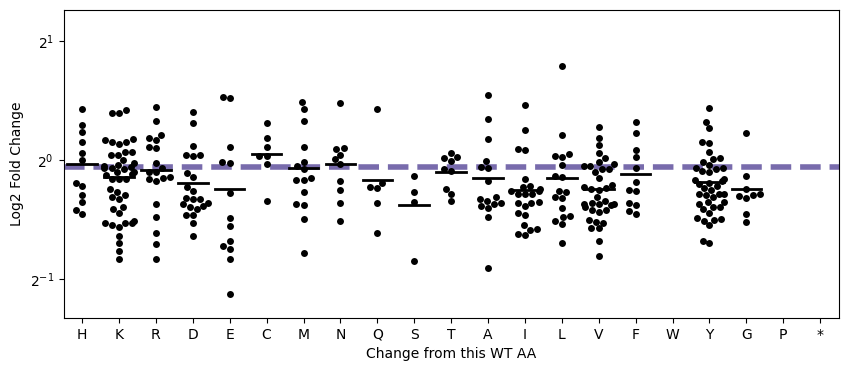

In [125]:
df3['WT AA'] = df3['k3l'].str.split('-').str[1].str[0]
df3['Nonsynonymous AA'] = df3['k3l'].str.split('-').str[1].str[-1]

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='WT AA',
    y='value', 
    color='black', 
    data=df3,
    #palette = color_dict,
    order=aa_list,
    #hue_order=['Resistant','STOP','Variant'],
    #estimator='mean'
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="WT AA",
    y="value",
    data=df3,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_list,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change from this WT AA')

/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use

Text(0.5, 14.722222222222216, 'Nonsynonymous change to this AA')

/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use 

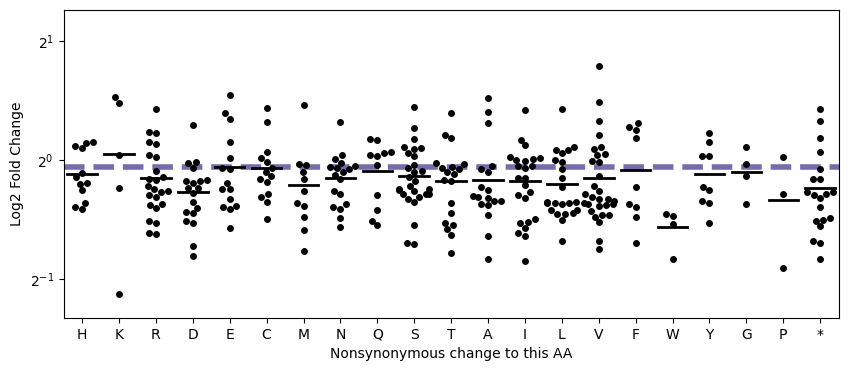

In [126]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='Nonsynonymous AA',
    y='value', 
    color='black', 
    data=df3,
    #palette = color_dict,
    order=aa_list,
    #hue_order=['Resistant','STOP','Variant'],
    #estimator='mean'
)

g.axhline(0.958688, color='#786bac', linestyle='--', linewidth=4, zorder=1)
g.set_yscale("log", base=2)
g.set_ylim(bottom=.4, top=2.4)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Nonsynonymous AA",
    y="value",
    data=df3,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_list,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Nonsynonymous change to this AA')

Text(0.5, 14.722222222222216, 'Change to this AA group')

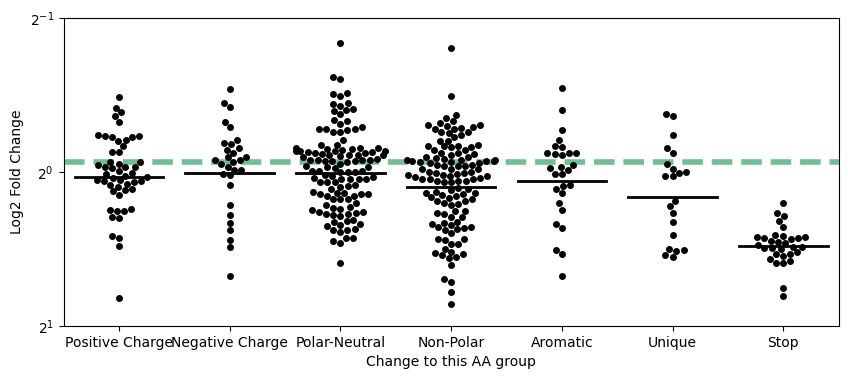

In [36]:
df4['aa_nonsynonymous'] = df4['pkr'].str.split('-').str[1].str[-1].map(aa_map)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='aa_nonsynonymous',
    y='value', 
    color='black',
    #hue='aa_same_category', 
    data=df4,
    #palette = color_dict,
    order=aa_categories,
    #hue_order=['Resistant','STOP','Variant']
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_nonsynonymous",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change to this AA group')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Aromatic to Aromatic'),
  Text(1, 0, 'Aromatic to Negative Charge'),
  Text(2, 0, 'Aromatic to Non-Polar'),
  Text(3, 0, 'Aromatic to Polar-Neutral'),
  Text(4, 0, 'Aromatic to Positive Charge'),
  Text(5, 0, 'Aromatic to Stop'),
  Text(6, 0, 'Aromatic to Unique'),
  Text(7, 0, 'Negative Charge to Aromatic'),
  Text(8, 0, 'Negative Charge to Negative Charge'),
  Text(9, 0, 'Negative Charge to Non-Polar'),
  Text(10, 0, 'Negative Charge to Polar-Neutral'),
  Text(11, 0, 'Negative Charge to Positive Charge'),
  Text(12, 0, 'Negative Charge to Stop'),
  Text(13, 0, 'Negative Charge to Unique'),
  Text(14, 0, 'Non-Polar to Aromatic'),
  Text(15, 0, 'Non-Polar to Negative Charge'),
  Text(16, 0, 'Non-Polar to Non-Polar'),
  Text(17, 0, 'Non-Polar to Polar-Neutral'),
  Text(18, 0, 'Non-Polar

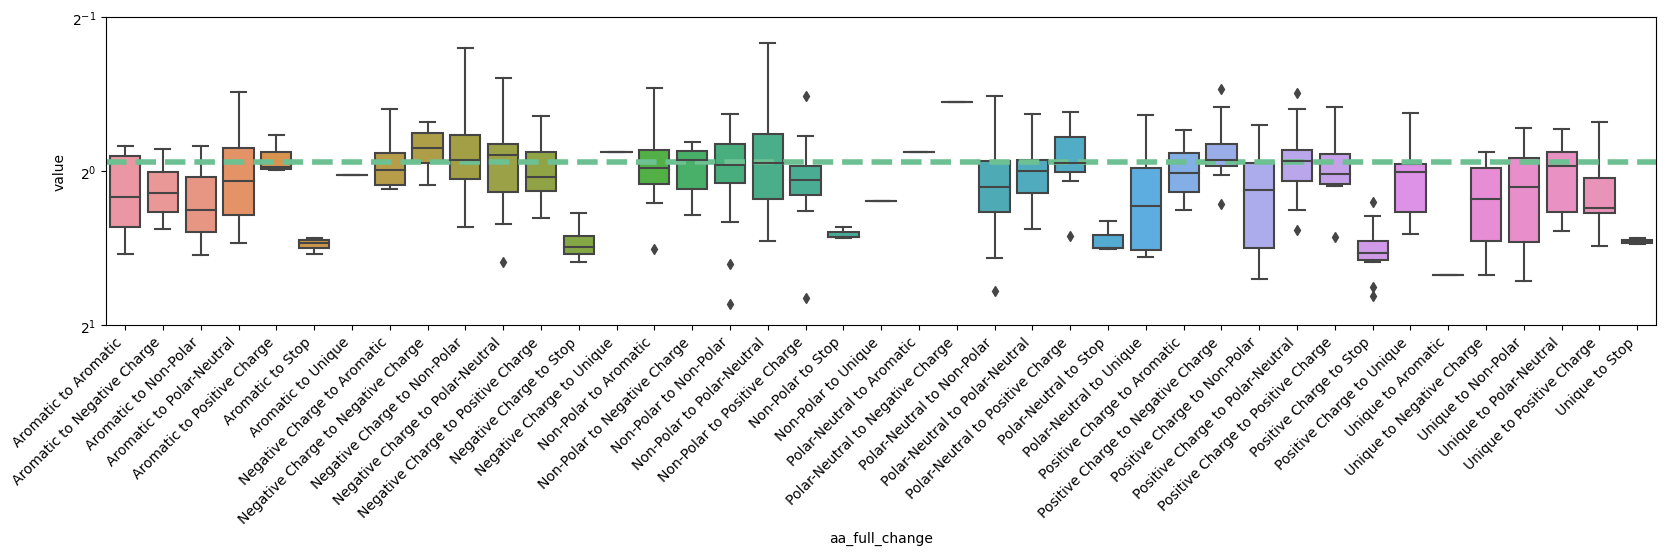

In [68]:
df4['aa_full_change'] = df4['aa_wt'] + " to " + df4['aa_nonsynonymous']

aa_full_change_mean_dict = df4.groupby('aa_full_change')['value'].mean().to_dict()
alph_order = list(aa_full_change_mean_dict.keys())

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.boxplot(
    x='aa_full_change',
    y='value', 
    #hue='aa_full_change', 
    data=df4,
    #palette = color_dict,
    order=alph_order,
    #hue_order=[alph_order]
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

plt.xticks(rotation=45, ha="right")

/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 14.722222222222216, 'AA Group Changes from A to B')

/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


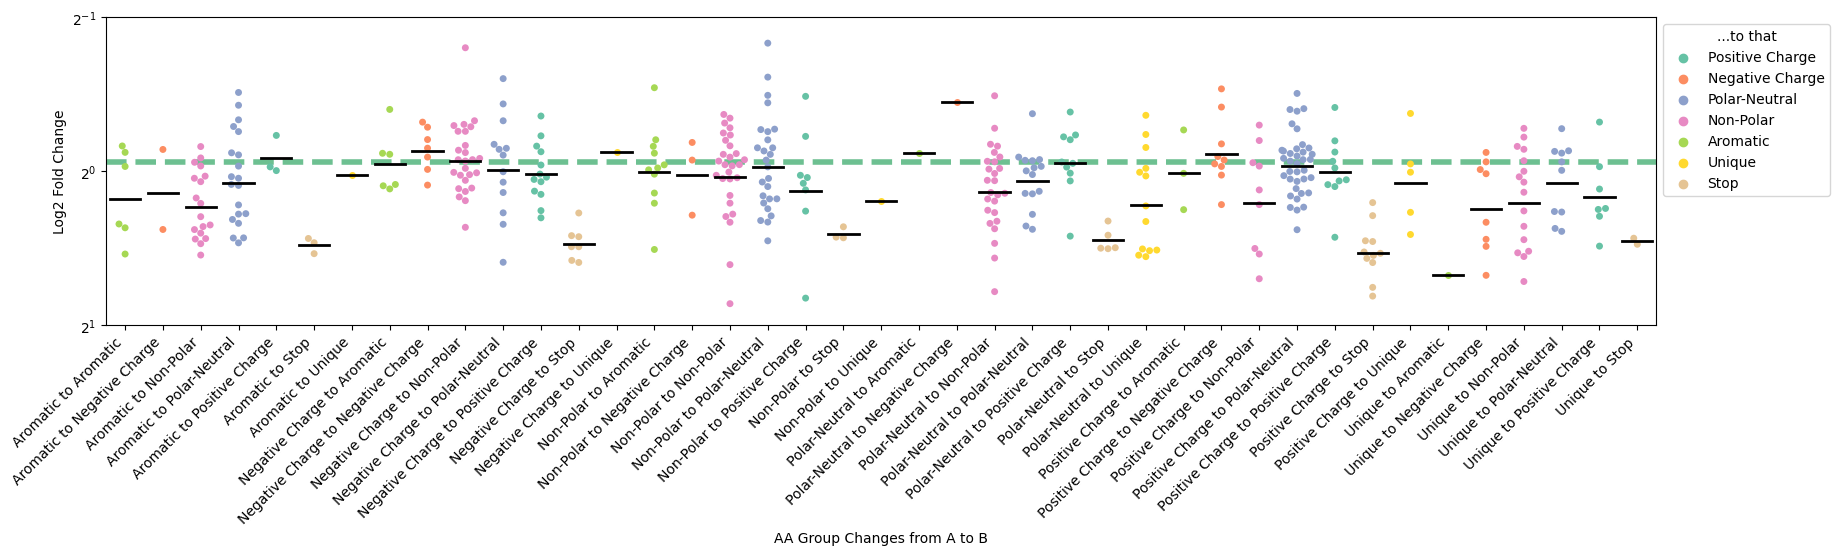

In [77]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.swarmplot(
    x='aa_full_change',
    y='value', 
    hue='aa_nonsynonymous', 
    data=df4,
    #palette = color_dict,
    order=alph_order,
    palette='Set2',
    hue_order=aa_categories
    
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_full_change",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=alph_order,
    ax=g
)

plt.xticks(rotation=45, ha="right")

g.legend(title='...to that',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('AA Group Changes from A to B')

(2, 0.5)

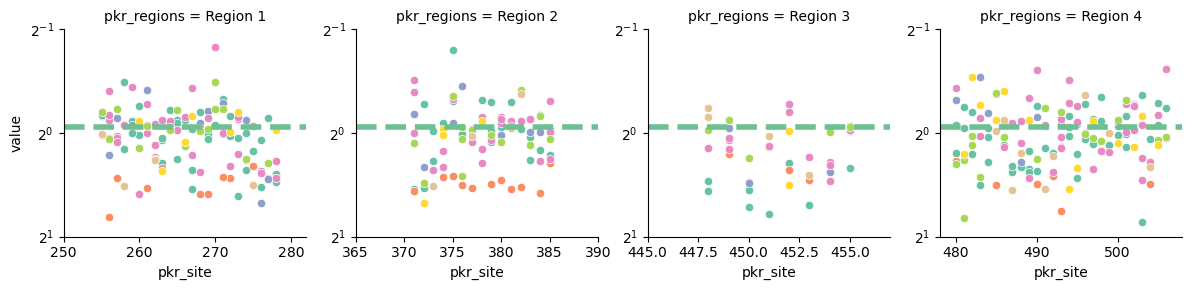

In [51]:
df4['pkr_site'] = df4['pkr'].str.split('-').str[1].str[1:-1].astype(int)

g = sns.FacetGrid(
    df4, 
    col='pkr_regions', 
    col_order=['Region 1','Region 2','Region 3', 'Region 4'],
    sharex=False,
    sharey=False,
    hue='aa_nonsynonymous',
    palette='Set2'
)



g.map(sns.scatterplot, 'pkr_site','value')
axes = g.axes



axes[0,0].set_xlim(250,282)
axes[0,0].invert_yaxis()
axes[0,0].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,0].set_yscale("log", base=2)
axes[0,0].set_ylim(bottom=2, top=.5)

axes[0,1].set_xlim(365,390)
axes[0,1].invert_yaxis()
axes[0,1].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,1].set_yscale("log", base=2)
axes[0,1].set_ylim(bottom=2, top=.5)

axes[0,2].set_xlim(445,457)
axes[0,2].invert_yaxis()
axes[0,2].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,2].set_yscale("log", base=2)
axes[0,2].set_ylim(bottom=2, top=.5)

axes[0,3].set_xlim(478,508)
axes[0,3].invert_yaxis()
axes[0,3].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,3].set_yscale("log", base=2)
axes[0,3].set_ylim(bottom=2, top=.5)


Text(0.5, 0, 'PKR Variant Site')

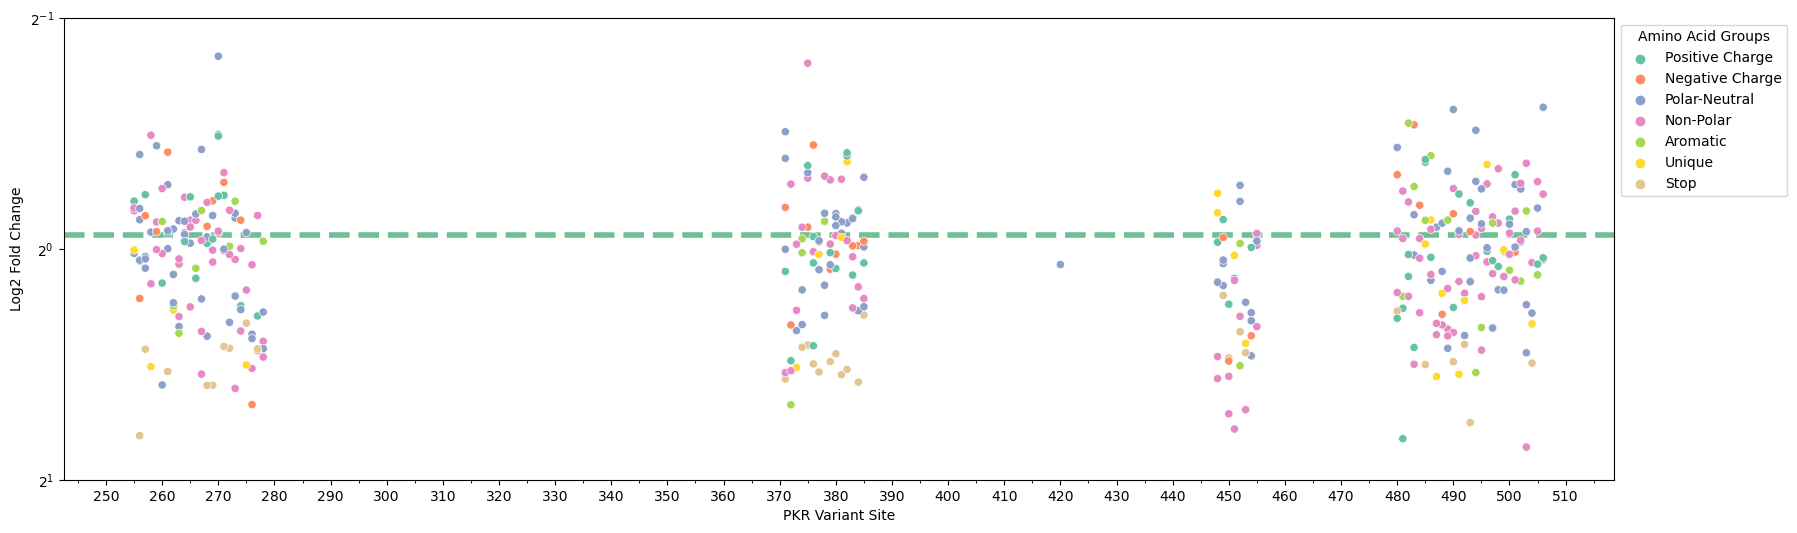

In [78]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,6)

g = sns.scatterplot(
    data=df4, 
    x='pkr_site',
    y='value',
    hue='aa_nonsynonymous',
    hue_order=aa_categories,
    palette='Set2',
    zorder=2
)

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4, zorder=1) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)
g.xaxis.set_minor_locator(MultipleLocator(5))
g.xaxis.set_major_locator(MultipleLocator(10))

g.legend(title='Amino Acid Groups',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('PKR Variant Site')

In [64]:
df4.head()

,pkr,pkr_type,pkr_regions,variable,value,pkr_site,aa_same_type,aa_wt,aa_nonsynonymous
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,278,False,Aromatic,Non-Polar
1,PKR-M455I,Missense Variant,Region 3,mean_fold_change,0.989696,455,False,Polar-Neutral,Non-Polar
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,454,False,Aromatic,Stop
3,PKR-E384D,Missense Variant,Region 2,mean_fold_change,0.990818,384,True,Negative Charge,Negative Charge
4,PKR-M455L,Missense Variant,Region 3,mean_fold_change,1.263435,455,False,Polar-Neutral,Non-Polar


Text(0.5, 0, 'PKR Variant Site')

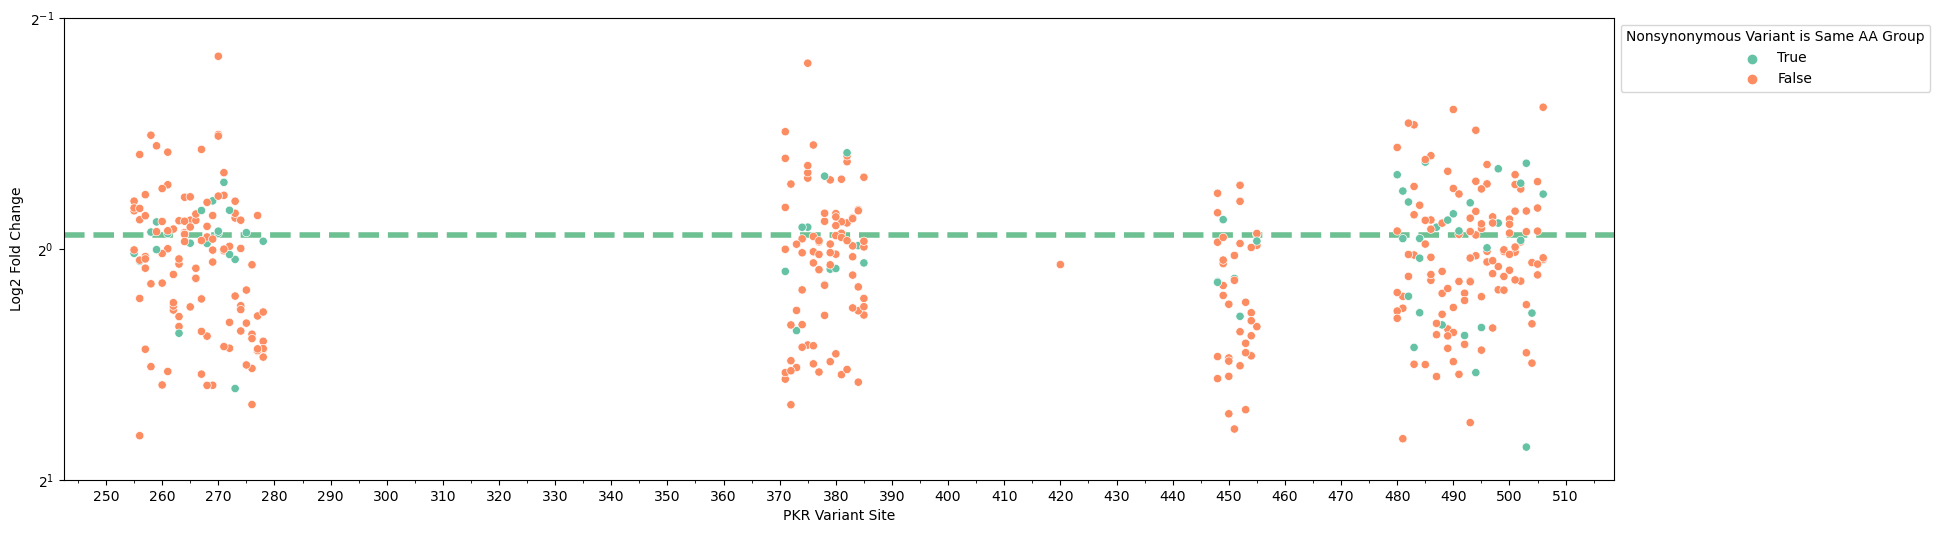

In [79]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,6)

g = sns.scatterplot(
    data=df4, 
    x='pkr_site',
    y='value',
    hue='aa_same_type',
    hue_order=[True,False],
    palette='Set2',
    zorder=2
)

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4, zorder=1) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)
g.xaxis.set_minor_locator(MultipleLocator(5))
g.xaxis.set_major_locator(MultipleLocator(10))

g.legend(title='Nonsynonymous Variant is Same AA Group',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('PKR Variant Site')

In [98]:
df4[df4['Selection Pressure'].notna()]

,pkr,pkr_type,pkr_regions,variable,value,pkr_site,aa_same_type,aa_wt,aa_nonsynonymous,aa_full_change,Selection Pressure
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,278,False,Aromatic,Non-Polar,Aromatic to Non-Polar,Purifying Selection
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,454,False,Aromatic,Stop,Aromatic to Stop,Purifying Selection
8,PKR-F278I,Missense Variant,Region 1,mean_fold_change,1.352741,278,False,Aromatic,Non-Polar,Aromatic to Non-Polar,Purifying Selection
9,PKR-E490D,Missense Variant,Region 4,mean_fold_change,0.900503,490,True,Negative Charge,Negative Charge,Negative Charge to Negative Charge,Purifying Selection
10,PKR-Y454C,Missense Variant,Region 3,mean_fold_change,1.211705,454,False,Aromatic,Polar-Neutral,Aromatic to Polar-Neutral,Purifying Selection
...,...,...,...,...,...,...,...,...,...,...,...
395,PKR-D266H,Missense Variant,Region 1,mean_fold_change,1.092704,266,False,Negative Charge,Positive Charge,Negative Charge to Positive Charge,Purifying Selection
397,PKR-F267C,Missense Variant,Region 1,mean_fold_change,0.742294,267,False,Aromatic,Polar-Neutral,Aromatic to Polar-Neutral,Purifying Selection
399,PKR-K380*,Nonsense,Region 2,mean_fold_change,1.370757,380,False,Positive Charge,Stop,Positive Charge to Stop,Positive Seletion
402,PKR-F267I,Missense Variant,Region 1,mean_fold_change,1.456898,267,False,Aromatic,Non-Polar,Aromatic to Non-Polar,Purifying Selection


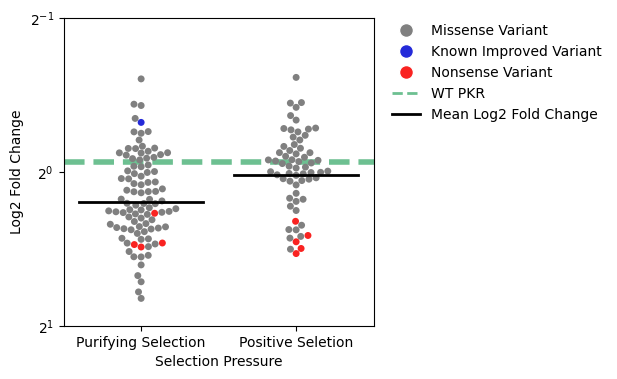

In [124]:
# positive selection
dar_red = [262,263,266,450,480,487,490,495,498,499] # highly conserved
dar_blue = [267,273,274,273,274,276,278,451,454,481] # well conserved
dar_neg = dar_red + dar_blue
elde_pos=[6,7,24,44,49,86,122,123,125,139,185,206,224,242,255,259,261,265,275,322,330,336,338,344,351,376,380,462,489,492,496,502,506,516,538]
full_sele = [dar_neg, elde_pos]

sele_map = {residue:selection for temp_list,selection in zip(full_sele,['Purifying Selection', 'Positive Seletion']) for residue in temp_list }
df4['Selection Pressure'] = df4['pkr_site'].map(sele_map)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

g = sns.swarmplot(
    x='Selection Pressure',
    y='value', 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4[df4['Selection Pressure'].notna()],
    order=['Purifying Selection','Positive Seletion']
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Selection Pressure",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['Purifying Selection','Positive Seletion'],
    ax=g
)

g.set_ylabel('Log2 Fold Change')
#g.set_xlabel('Selection Pressure')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types', 

In [85]:
df4

,pkr,pkr_type,pkr_regions,variable,value,pkr_site,aa_same_type,aa_wt,aa_nonsynonymous,aa_full_change,Selection Pressure
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,278,False,Aromatic,Non-Polar,Aromatic to Non-Polar,Purifying Selection
1,PKR-M455I,Missense Variant,Region 3,mean_fold_change,0.989696,455,False,Polar-Neutral,Non-Polar,Polar-Neutral to Non-Polar,NaN
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,454,False,Aromatic,Stop,Aromatic to Stop,Purifying Selection
3,PKR-E384D,Missense Variant,Region 2,mean_fold_change,0.990818,384,True,Negative Charge,Negative Charge,Negative Charge to Negative Charge,NaN
4,PKR-M455L,Missense Variant,Region 3,mean_fold_change,1.263435,455,False,Polar-Neutral,Non-Polar,Polar-Neutral to Non-Polar,NaN
...,...,...,...,...,...,...,...,...,...,...,...
400,PKR-S448A,Missense Variant,Region 3,mean_fold_change,1.382137,448,False,Polar-Neutral,Non-Polar,Polar-Neutral to Non-Polar,NaN
401,PKR-I420T,Missense Variant,NaN,mean_fold_change,1.048707,420,False,Non-Polar,Polar-Neutral,Non-Polar to Polar-Neutral,NaN
402,PKR-F267I,Missense Variant,Region 1,mean_fold_change,1.456898,267,False,Aromatic,Non-Polar,Aromatic to Non-Polar,Purifying Selection
403,PKR-I503L,Missense Variant,Region 4,mean_fold_change,1.813361,503,True,Non-Polar,Non-Polar,Non-Polar to Non-Polar,NaN


(2, 0.5)

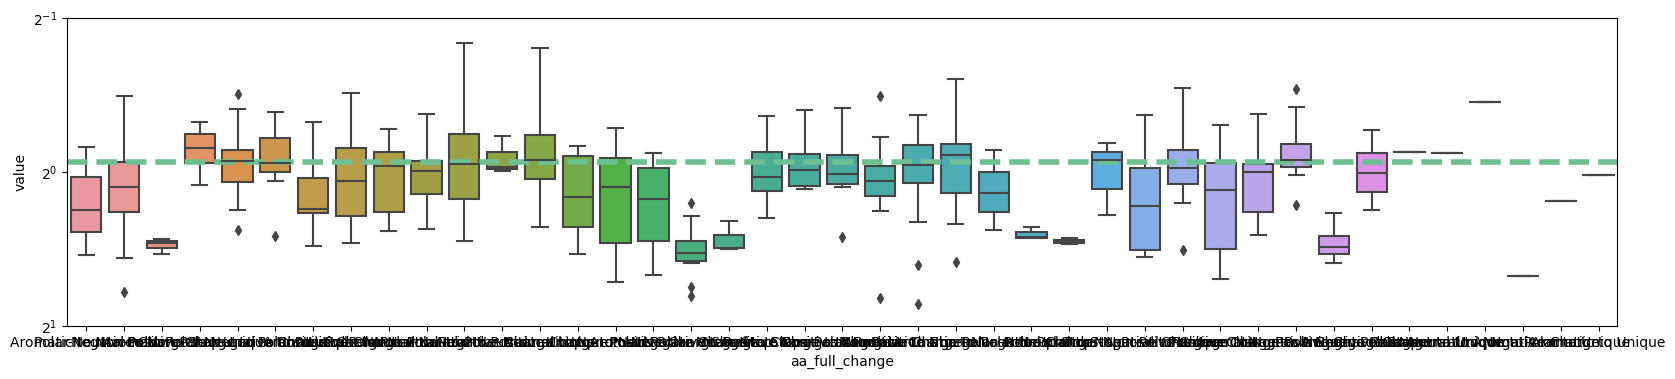

In [63]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.boxplot(
    x='aa_full_change',
    y='value', 
    #hue='aa_full_change', 
    data=df4,
    #palette = color_dict,
    #order=['Resistant','STOP','Variant'],
    #hue_order=['Resistant','STOP','Variant']
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

In [ ]:
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="method",
            y="distance",
            data=planets,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

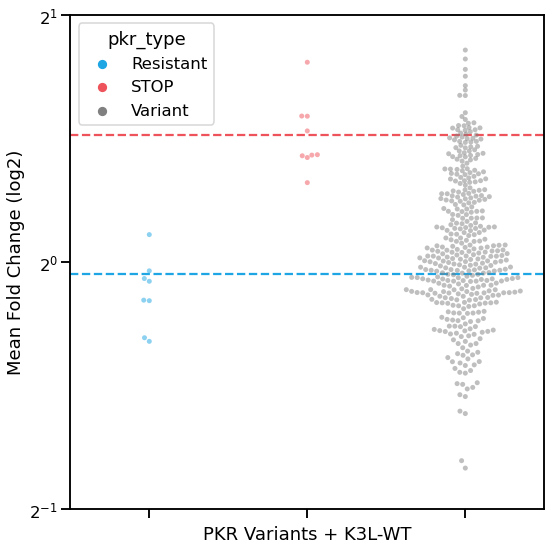

In [28]:
g.invert_yaxis()

g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls



g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/violinplot.png')

In [24]:
df2.pkr_type.value_counts()

Variant      388
STOP           9
Resistant      8
WT             1
Name: pkr_type, dtype: int64

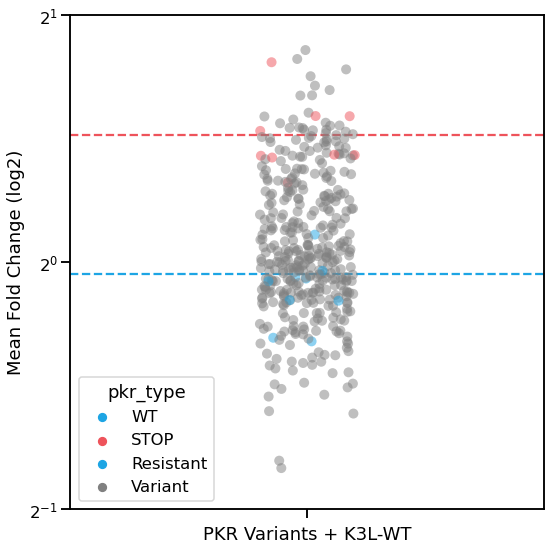

In [9]:
plt.rcParams["figure.figsize"] = (8,8)
sns.set_context("talk")

color_dict = {'WT':"#1DA5E4",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'gray'}
marker = {'WT':10,'STOP':5,"Resistant":5,"Variant":5}

g = sns.stripplot(
    x='variable',
    y='value', 
    hue='pkr_type', 
    data=df2, 
    alpha=.5,
    hue_order=['WT','STOP','Resistant','Variant'],
    #order=['WT','STOP','Resistant','Variant'],
    palette = color_dict,
    size=10
)
# PKR WT line
g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls

g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/stripplot.png')

In [172]:
df2.groupby('pkr_type')['value'].mean()

pkr_type
Resistant    0.920829
STOP         1.428106
Variant      1.061301
WT           0.958688
Name: value, dtype: float64

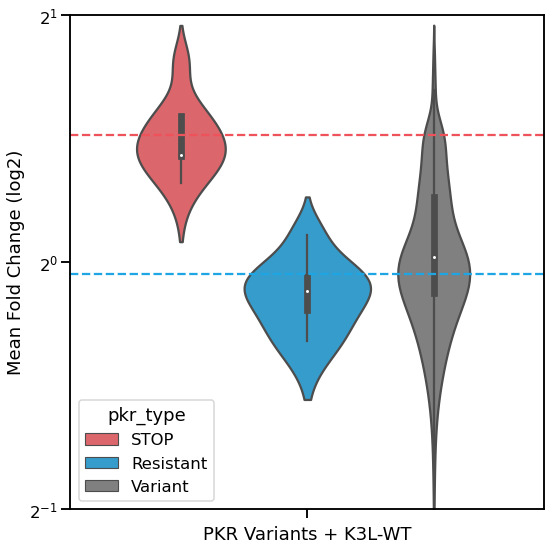

In [10]:
# violin
g = sns.violinplot(
    x='variable',
    y='value', 
    hue='pkr_type', 
    data=df2,
    palette = color_dict,
    hue_order=['STOP','Resistant','Variant']
)
g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls

g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/violinplot.png')

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85617/3933723956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tp0_read_mean'] = df1[['1','2','3']].mean(axis=1)


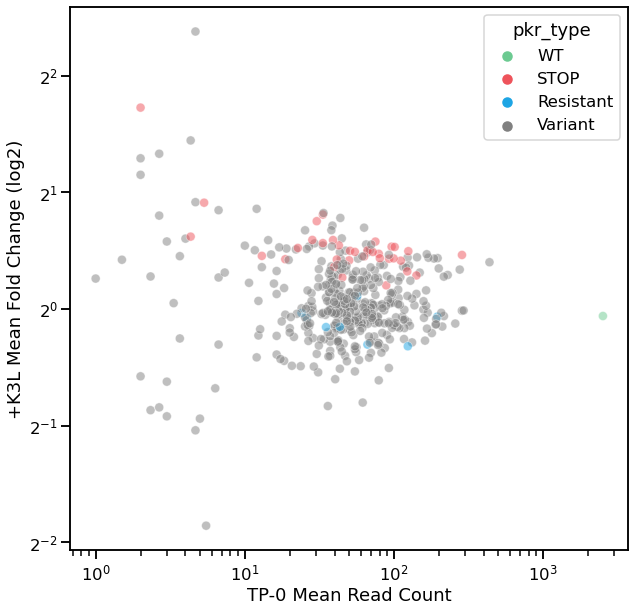

In [121]:
# maybe use a cutoff of 10 reads for the first timepoint
color_dict = {'WT':"#6CCA91",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'gray'}

g=sns.scatterplot(
    y='mean_fold_change',
    x='tp0_read_mean',
    data=df1,
    hue='pkr_type',
    alpha=.5,
    hue_order=['WT','STOP','Resistant','Variant'],
    palette=color_dict
)
g.set_yscale("log", base=2)
g.set_xscale("log", base=10)

g.set_ylabel('+K3L Mean Fold Change (log2)')
g.set_xlabel('TP-0 Mean Read Count')
fig = g.get_figure()
fig.savefig('../img/xy_reads-fc.png')

"g.set_ylabel('+Null Fold Change (log2)')\ng.set_xlabel('+K3L Fold Change (log2)')\nfig = g.get_figure()\nfig.savefig('../img/stripplot.png')"

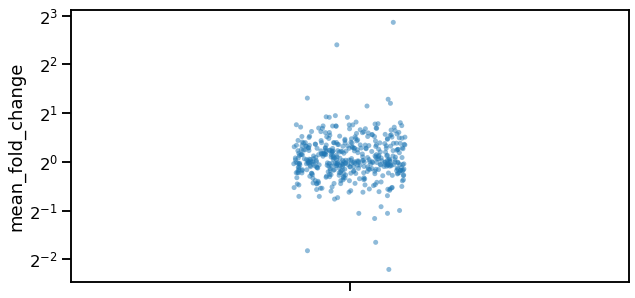

In [42]:
plt.rcParams["figure.figsize"] = (10,5)
sns.set_context("talk")

color_dict = {'WT':"#6CCA91",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'#FAAF4C'}

ax = sns.stripplot(
    y='mean_fold_change',
    hue='pkr_type',
    data=df1,
    alpha=.5
)
ax.set_yscale("log", base=2)

"""g.set_ylabel('+Null Fold Change (log2)')
g.set_xlabel('+K3L Fold Change (log2)')
fig = g.get_figure()
fig.savefig('../img/stripplot.png')"""

In [32]:
# now try to collect all other variants with WT and STOPS
# PKR
pkr_var = pd.read_csv('../data/pkr_agei-noti.codon_variant_table.csv')
pkr_dict = {}
pkr_dict['PKR-WT'] = pkr_var.query('n_aa_substitutions == 0').barcode.tolist()
pkr_stop = 350
pkr_dict['PKR-STOP'] = pkr_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ')[pkr_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ').aa_substitutions.str[1:-1].astype(int) < pkr_stop].barcode.tolist()

pkr_dict = {val:key for key, lst in pkr_dict.items() for val in lst}
pkr_vars = pkr_var.query('n_aa_substitutions == 1 and aa_substitutions.str[-1] != "*"') # all other variants
pkr_dict = pkr_dict | dict(zip(pkr_vars.barcode, pkr_vars.aa_substitutions))


# K3L 
k3l_var = pd.read_csv('../data/k3l_pvui-bamhi.codon_variant_table.csv')
k3l_var['barcode_rev_comp'] = k3l_var.barcode.apply(lambda x: ''.join(Seq(x).reverse_complement()))
k3l_dict = {}
k3l_dict['K3L-WT'] = k3l_var.query('n_aa_substitutions == 0').barcode_rev_comp.tolist()
k3l_stop = 40
k3l_dict['K3L-STOP'] = k3l_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ')[k3l_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ').aa_substitutions.str[1:-1].astype(int) < k3l_stop].barcode_rev_comp.tolist()
k3l_dict = {val:key for key, lst in k3l_dict.items() for val in lst}

k3l_vars = k3l_var.query('n_aa_substitutions == 1 and aa_substitutions.str[-1] != "*"') # all other variants
k3l_dict = k3l_dict | dict(zip(k3l_vars.barcode, k3l_vars.aa_substitutions))


# brief version to compile WT and STOP variants
sample_list = [1,2,3,4,5,6]
for sample in sample_list:
    df1 = pd.read_csv(f'../bartender/{sample}.pkr_barcode.txt', names=['pkr_barcode', 'line'])
    df2 = pd.read_csv(f'../bartender/{sample}.k3l_barcode.txt', names=['k3l_barcode', 'line'])

    # make a clus:var dict for pkr and k3l, wider net for identifying variants

    df3 = pd.merge(df1,df2,on='line', how='inner')
    df3['pkr'] = df3.pkr_barcode.map(pkr_dict)
    df3['k3l'] = df3.k3l_barcode.map(k3l_dict)
    df3 = df3.query('pkr.isnull() == False and k3l.isnull() == False') # dump nulls (half reads)
    df3['comb'] = df3.pkr.astype(str) + '_' + df3.k3l.astype(str)
    temp_df = df3.comb.value_counts().rename_axis('var').reset_index(name=sample)
    if sample == 1:
        df = temp_df
    else:
        df = pd.merge(df, temp_df, on='var',how='outer')
        

In [33]:
df['pkr'] = df['var'].str.split('_').str[0]
df['k3l'] = df['var'].str.split('_').str[1]

In [34]:
df2 = df.query('k3l == "K3L-WT"')

In [35]:
sample_list = [1,2,3,4,5,6]
# normalize read count
for sample in sample_list:
    df2[f'{sample}_norm'] = df2[sample]/df2[sample].sum()

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85425/858053354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{sample}_norm'] = df2[sample]/df2[sample].sum()


In [36]:
# fold change
for t0,t1 in zip([1,2,3],[4,5,6]):
    df2[f'fold_change_{t0}'] = (df2[f'{t1}_norm'] - df2[f'{t0}_norm'])/df2[f'{t0}_norm']

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85425/1082548071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'fold_change_{t0}'] = (df2[f'{t1}_norm'] - df2[f'{t0}_norm'])/df2[f'{t0}_norm']


In [37]:
df1 = df2.melt('var','fold_change_1','fold_change','value')

In [49]:
df1['pkr'] = df1['var'].str.split('_').str[0]
df1['k3l'] = df1['var'].str.split('_').str[1]

df1 = df1.query('k3l == "K3L-WT"')

def check_pkr(row, k3l_stop=40, pkr_stop=350):
    pkr_var = row['pkr']
    if pkr_var == 'PKR-WT':
        return 'PKR-WT'
    elif pkr_var == 'PKR-STOP':
        return 'PKR-STOP' 
    else:
        return 'PKR-VAR'
    

In [50]:
df1

,var,fold_change,value,pkr,k3l
0,PKR-WT_K3L-WT,fold_change_1,-0.073675,PKR-WT,K3L-WT
1,PKR-STOP_K3L-WT,fold_change_1,0.361399,PKR-STOP,K3L-WT
2,F278L_K3L-WT,fold_change_1,0.100265,F278L,K3L-WT
3,M455I_K3L-WT,fold_change_1,-0.121961,M455I,K3L-WT
4,E384D_K3L-WT,fold_change_1,0.026253,E384D,K3L-WT
...,...,...,...,...,...
400,I502C_K3L-WT,fold_change_1,0.315438,I502C,K3L-WT
401,R447M_K3L-WT,fold_change_1,0.315438,R447M,K3L-WT
402,H286R_K3L-WT,fold_change_1,1.630876,H286R,K3L-WT
403,D370Y_K3L-WT,fold_change_1,NaN,D370Y,K3L-WT


In [52]:
df1['pkr_type'] = df1.apply(lambda x: check_pkr(x), axis=1)

In [54]:
df1

,var,fold_change,value,pkr,k3l,pkr_type
0,PKR-WT_K3L-WT,fold_change_1,-0.073675,PKR-WT,K3L-WT,PKR-WT
1,PKR-STOP_K3L-WT,fold_change_1,0.361399,PKR-STOP,K3L-WT,PKR-STOP
2,F278L_K3L-WT,fold_change_1,0.100265,F278L,K3L-WT,PKR-VAR
3,M455I_K3L-WT,fold_change_1,-0.121961,M455I,K3L-WT,PKR-VAR
4,E384D_K3L-WT,fold_change_1,0.026253,E384D,K3L-WT,PKR-VAR
...,...,...,...,...,...,...
400,I502C_K3L-WT,fold_change_1,0.315438,I502C,K3L-WT,PKR-VAR
401,R447M_K3L-WT,fold_change_1,0.315438,R447M,K3L-WT,PKR-VAR
402,H286R_K3L-WT,fold_change_1,1.630876,H286R,K3L-WT,PKR-VAR
403,D370Y_K3L-WT,fold_change_1,NaN,D370Y,K3L-WT,PKR-VAR


<AxesSubplot:xlabel='fold_change', ylabel='value'>

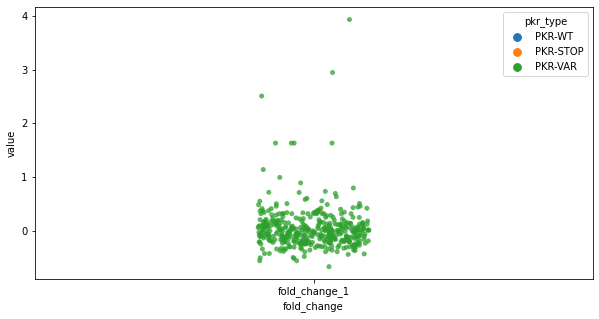

In [71]:
# log2 transform fold change
df1['log2_value'] = df1['value'].apply(lambda x: log2_transform(x))

sns.stripplot(data=df1, x='fold_change',y='value', hue='pkr_type',alpha=.75)



In [72]:
df2

,var,1,2,3,4,5,6,pkr,k3l,1_norm,2_norm,3_norm,4_norm,5_norm,6_norm,fold_change_1,fold_change_2,fold_change_3
0,PKR-WT_K3L-WT,3242.0,1863.0,2433.0,2283.0,2877.0,2144.0,PKR-WT,K3L-WT,0.087106,0.085341,0.092848,0.080688,0.081573,0.084423,-0.073675,-0.044155,-0.090747
1,PKR-STOP_K3L-WT,830.0,515.0,602.0,859.0,1069.0,791.0,PKR-STOP,K3L-WT,0.022300,0.023591,0.022974,0.030360,0.030310,0.031147,0.361399,0.284787,0.355758
2,F278L_K3L-WT,593.0,305.0,411.0,496.0,737.0,495.0,F278L,K3L-WT,0.015933,0.013972,0.015685,0.017530,0.020897,0.019491,0.100265,0.495644,0.242698
3,M455I_K3L-WT,406.0,210.0,239.0,271.0,324.0,243.0,M455I,K3L-WT,0.010908,0.009620,0.009121,0.009578,0.009187,0.009568,-0.121961,-0.045038,0.049085
4,E384D_K3L-WT,373.0,226.0,279.0,291.0,372.0,227.0,E384D,K3L-WT,0.010022,0.010353,0.010647,0.010285,0.010548,0.008938,0.026253,0.018814,-0.160494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,I502C_K3L-WT,1.0,NaN,2.0,1.0,2.0,NaN,I502C,K3L-WT,0.000027,NaN,0.000076,0.000035,0.000057,NaN,0.315438,NaN,NaN
763,R447M_K3L-WT,1.0,NaN,1.0,1.0,1.0,1.0,R447M,K3L-WT,0.000027,NaN,0.000038,0.000035,0.000028,0.000039,0.315438,NaN,0.031816
765,H286R_K3L-WT,1.0,NaN,3.0,2.0,3.0,5.0,H286R,K3L-WT,0.000027,NaN,0.000114,0.000071,0.000085,0.000197,1.630876,NaN,0.719693
778,D370Y_K3L-WT,NaN,3.0,NaN,NaN,3.0,1.0,D370Y,K3L-WT,NaN,0.000137,NaN,NaN,0.000085,0.000039,NaN,-0.381043,NaN
